1.72932943352677


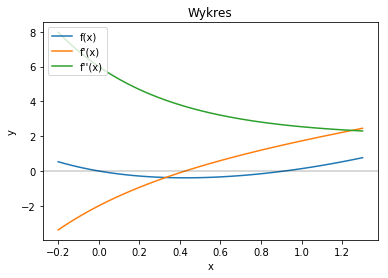

In [36]:
#ZADANIE 1
import matplotlib.pyplot as plt
import numpy as np
from math import *
import scipy.misc
import mpmath

def funkcja(x):
     return e**((-2)*x)+x**2-1

def funkcja1(x):
    return mpmath.diff(funkcja, x)

def funkcja2(x):
    return mpmath.diff(funkcja1, x)

print(funkcja1(1.0))
    
x = np.linspace(-0.2,1.3)
y = funkcja(x)
p1 = funkcja1(x)
p2 = funkcja2(x)

plt.plot(x, y, label="f(x)")
plt.plot(x, p1, label="f'(x)")
plt.plot(x, p2, label="f''(x)")
plt.title('Wykres')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color = "black", lw=0.3)
plt.legend(loc='upper left')
plt.show()

#funkcja(x) = 0 dla x = 0.3 (w przybliżeniu)
#przedział dla metody bisekcji, siecznych i stycznych: (-0.4, 0.4), (0.6, 1.2)


In [35]:
#ZADANIE 2
import time 
from math import *
import scipy.optimize as optimize

def f(x):
    return e**(-2*x) + x**2 -1

def bisectionMethod(f, a, b, dokladnosc, maxIt):
    if(f(a) == 0.0):
        return a, 0
    elif(f(b) == 0.0):
        return b, 0
    elif(f(a)*f(b)>0.0):
        return False  
    for i in range(maxIt):
        x = (a+b)/2
        if (f(x) == 0.0):
            return x, i
        elif(f(x)*f(a)<0.0):
            b = x
        else:
            a = x        
        if(fabs(b-a) < dokladnosc):
            return x, i
    return x, i+1

start = time.time()
for i in range (1000):
    x1, it = bisectionMethod(f, -0.25, 0.5, 1e-10, 10000)
x1_time = time.time() - start
print("Czas wykonania własnej implementacji 1000 razy: ",x1_time)
print("x1 = ",x1, " dla ", it, " iteracji.")

start = time.time()
for i in range (1000):
    x2, it = bisectionMethod(f, 0.5, 1, 1e-10, 10000)
x2_time = time.time() - start
print("Czas wykonania własnej implementacji 1000 razy: ",x2_time)
print("x2 = ",x2, " dla ", it, " iteracji.")

start = time.time()
for i in range (1000):
    x1 = optimize.bisect(f, -0.25, 0.5, xtol = 1e-10, maxiter=10000)
x1_time = time.time() - start
print("Czas wykonania wbudowanej funkcji 1000 razy: ",x1_time)
print("x1 = ",x1)

start = time.time()
for i in range (1000):
    x2 = optimize.bisect(f, 0.5, 1, xtol = 1e-10, maxiter=10000)
x2_time = time.time() -start
print("Czas wykonania wbudowanej funkcji 1000 razy: ",x2_time)
print("x2 = ",x2)


Czas wykonania własnej implementacji 1000 razy:  0.05987715721130371
x1 =  2.9103830456733704e-11  dla  32  iteracji.
Czas wykonania własnej implementacji 1000 razy:  0.05784249305725098
x2 =  0.9165625831228681  dla  32  iteracji.
Czas wykonania wbudowanej funkcji 1000 razy:  0.019946813583374023
x1 =  2.9103830456733704e-11
Czas wykonania wbudowanej funkcji 1000 razy:  0.018980979919433594
x2 =  0.9165625831228681


In [40]:
#ZADANIE 3

import time 
from math import *
import scipy.optimize as optimize
import mpmath

def f(x):
    return e**(-2*x) + x**2 -1

def f1(x):
    return (-2)*e**(-2*x) + 2*x


def newtonMethod(f,f1, a, dokladnosc, maxIt):
    it = 0
    x0 = a
    x1 = x0+1
    while fabs(x1-x0) >= dokladnosc or fabs(f(x0)) >= dokladnosc:
        if fabs(f1(x1)) <= dokladnosc:
            break
        else:
            x1 = x0
            x0 = x0 - f(x0)/f1(x0)
        it += 1
        if(it == 0):
            break
            
    return x1,it

# Warunki wystarczające zbieżności metody stycznych w przedziale izolacji pierwiastka (przedział [a,b]):
# f(x) jest ciągła w przedziale domkniętym [a,b]
# pierwsza i druga pochodna f(x) istnieją i są ciągłe w przedziale domkniętym [a,b]
# f(x) na krańcach przedziału [a,b] przyjmuje różne znaki (f(a)*f(b) < 0)
# w przedziale [a,b] pierwsza i druga pochodna mają stały znak. Oznacza to, że w przedziale nie ma ekstremów lokalnych 
# ani punktów przegięcia 

        
#Punktem startowym obliczeń jest ten koniec przedziału [a,b], w którym funkcja f(x) przyjmuje ten sam znak co jej druga pochodna,
#czyli zachodzi f(x)*f2(x)>0, gdzie x=a lub x=b

t1=0
for i in range(1000):
    startTime = time.time()
    x1, it = newtonMethod(f, f1, -0.5, 10**(-10), 100)
    endTime = time.time()
    t1 += endTime-startTime
print("miejsce zerowe: ",x1, "\tczas działania: ",t1, "\tliczba iteracji: ",it)    

t2=0
for i in range(1000):
    startTime = time.time()
    x2, it = newtonMethod(f, f1, 1, 10**(-10), 100)
    endTime = time.time()
    t2 += endTime-startTime
print("miejsce zerowe: ",x2, "\tczas działania: ",t2, "\tliczba iteracji: ",it) 
   
print("\nWyniki dla funkcji scipy.optimize.newton():")
t3=0
for i in range(1000):
    startTime = time.time()
    x3 = optimize.newton(f, -0.5, fprime=f1, tol=10**(-10), maxiter=100)
    endTime = time.time()
    t3 += endTime-startTime
print("miejsce zerowe: ",x3, "\tczas działania: ",t3)
t4=0
for i in range(1000):
    startTime = time.time()
    x4 = optimize.newton(f, 1, fprime=f1, tol=10**(-10), maxiter=100)
    endTime = time.time()
    t4 += endTime-startTime
print("miejsce zerowe: ",x4, "\tczas działania: ",t4)

miejsce zerowe:  -9.191619259508066e-11 	czas działania:  0.009972810745239258 	liczba iteracji:  6
miejsce zerowe:  0.9165625831056982 	czas działania:  0.008975505828857422 	liczba iteracji:  5

Wyniki dla funkcji scipy.optimize.newton():
miejsce zerowe:  -5.125559246038141e-17 	czas działania:  0.007978200912475586
miejsce zerowe:  0.9165625831056982 	czas działania:  0.0059854984283447266


In [34]:
#ZADANIE 4

import time 
from math import *
import scipy.optimize as optimize
import mpmath

def f(x):
    return e**(-2*x) + x**2 -1


def eulerMethod(f, a, b, dokladnosc, maxIt):
    x1=a
    x2=b
    
    if(f(x1) == 0):
        return x1, 0
    if(f(x2) == 0):
        return x2, 0

    for i in range(maxIt):
        x0 = x1 - f(x1)/(f(x2)-f(x1)) * (x2-x1)
        if (f(x0) == 0.0):
            return x0, i+1
        if(fabs(x0 - x1) <= dokladnosc):
            return x0,i+1
        x2 = x1
        x1 = x0
    return x0, i+1
           
            
# Warunki wystarczające zbieżności metody siecznych w przedziale izolacji pierwiastka (przedział [a,b]):
# f(x) jest ciągła w przedziale domkniętym [a,b]
# pierwsza i druga pochodna f(x) istnieją i są ciągłe w przedziale domkniętym [a,b]
# f(x) na krańcach przedziału [a,b] przyjmuje różne znaki (f(a)*f(b) < 0)
# w przedziale [a,b] pierwsza i druga pochodna mają stały znak. Oznacza to, że w przedziale nie ma ekstremów lokalnych 
# ani punktów przegięcia 


t1=0
for i in range(1000):
    startTime = time.time()
    x1, it = eulerMethod(f, -0.25, 0.3, 10**(-10), 100)
    endTime = time.time()
    t1 += endTime-startTime
print("miejsce zerowe: ",x1, "\tczas działania: ",t1, "\tliczba iteracji: ",it)    

t2=0
for i in range(1000):
    startTime = time.time()
    x2, it = eulerMethod(f, 0.25, 1, 10**(-10), 100)
    endTime = time.time()
    t2 += endTime-startTime
print("miejsce zerowe: ",x2, "\tczas działania: ",t2, "\tliczba iteracji: ",it)            
    
    
print("\nWyniki dla funkcji scipy.optimize.newton():")
t3=0
for i in range(1000):
    startTime = time.time()
    x3 = optimize.newton(f, -0.25, tol=10**(-10), maxiter=100)
    endTime = time.time()
    t3 += endTime-startTime
print("miejsce zerowe: ",x3, "\tczas działania: ",t3)    
            
t4=0
for i in range(1000):
    startTime = time.time()
    x4 = optimize.newton(f, 0.5, tol=10**(-10), maxiter=100)
    endTime = time.time()
    t4 += endTime-startTime
print("miejsce zerowe: ",x4, "\tczas działania: ",t4)


miejsce zerowe:  2.6230606983890833e-18 	czas działania:  0.017951488494873047 	liczba iteracji:  8
miejsce zerowe:  0.9165625831056982 	czas działania:  0.020905017852783203 	liczba iteracji:  9

Wyniki dla funkcji scipy.optimize.newton():
miejsce zerowe:  3.5586237242500555e-18 	czas działania:  0.006982564926147461
miejsce zerowe:  0.916562583105698 	czas działania:  0.008975505828857422


In [ ]:
#Najszybszym algorytmem jest metoda Newtona